# Desafio Moscas Brancas

## Prof. Anderson Brilhador

**Desafio**: Escreva um programa que realiza a contagem das moscas brancas nas três imagens abaixo. Para este desafio será permitido apenas o uso de técnicas de processamentos de imagens vistas ou não neste curso.

Importando as bibliotecas necessárias:

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Lendo as imagens das moscas e trocando os canais(de RBG para GRAY):

In [3]:
moscas1 = cv2.imread('/home/gianlucca/Downloads/moscas1.jpg')
moscas2 = cv2.imread('/home/gianlucca/Downloads/moscas2.jpg')
moscas3 = cv2.imread('/home/gianlucca/Downloads/moscas3.jpg')

In [4]:
moscas1 = cv2.cvtColor(moscas1 , cv2.COLOR_BGR2GRAY)
moscas2 = cv2.cvtColor(moscas2 , cv2.COLOR_BGR2GRAY)
moscas3 = cv2.cvtColor(moscas3 , cv2.COLOR_BGR2GRAY)

Visualização das imagens em cinza:

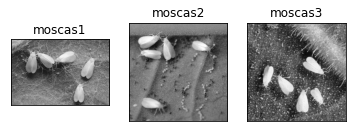

In [5]:
names = ['moscas1' , 'moscas2' , 'moscas3']
images = [moscas1,moscas2,moscas3]
for i in range(3):
    plt.subplot(1,3,i+1) , plt.imshow(images[i] , cmap='gray')
    plt.title(names[i])
    plt.xticks([]) , plt.yticks([])
plt.show()
    

Abaixo está o histograma das 3 imagens:

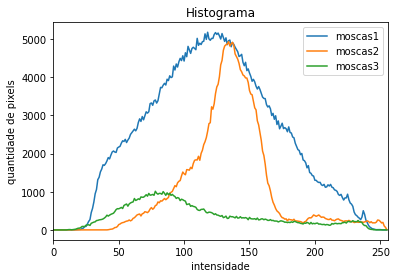

In [6]:
h1 = cv2.calcHist([moscas1] , [0] , None , [256] , [0,256])
h2 = cv2.calcHist([moscas2] , [0] , None , [256] , [0,256])
h3 = cv2.calcHist([moscas3] , [0] , None , [256] , [0,256])

plt.figure()
plt.xlabel('intensidade')
plt.ylabel('quantidade de pixels')
plt.plot(h1, label='moscas1')
plt.plot(h2, label='moscas2')
plt.plot(h3 , label='moscas3')
plt.title('Histograma')
plt.xlim([0,256])
plt.legend()
plt.show()

Após transformar as imagens em cinza, vamos suavizar as imagens digitais, o tipo de suavização de cada imagem foi escolhido após verificar todos e escolher o melhor, observa-se que foi escolhido uma máscara 15x15 para ter um efeito melhor.

In [7]:
moscas1 = cv2.blur(moscas1 , (15,15))
moscas2 = cv2.blur(moscas2 , (15,15))
moscas3 = cv2.medianBlur(moscas3 , 15)

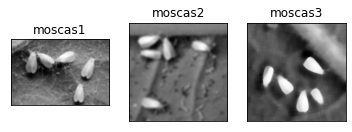

In [8]:
55images = [moscas1,moscas2,moscas3]
for i in range(3):
    plt.subplot(1,3,i+1) , plt.imshow(images[i] , cmap='gray')
    plt.title(names[i])
    plt.xticks([]) , plt.yticks([])
    
plt.show()

Após a suavização, foi observado que o histograma mudou, o que era esperado. Agora o histograma pode auxiliar para escolher o threshold mais adequado na hora de fazer a limiarização das imagens.

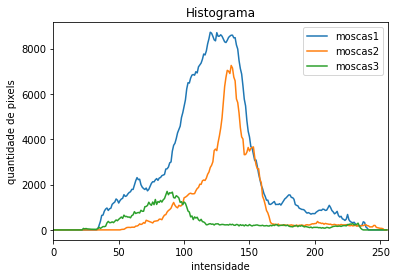

In [9]:
h1 = cv2.calcHist([moscas1] , [0] , None , [256] , [0,256])
h2 = cv2.calcHist([moscas2] , [0] , None , [256] , [0,256])
h3 = cv2.calcHist([moscas3] , [0] , None , [256] , [0,256])

plt.figure()
plt.xlabel('intensidade')
plt.ylabel('quantidade de pixels')
plt.plot(h1, label='moscas1')
plt.plot(h2, label='moscas2')
plt.plot(h3 , label='moscas3')
plt.title('Histograma')
plt.xlim([0,256])
plt.legend()
plt.show()

O threshold de cada foto foi escolhido fazendo testes, com exceção da imagem 2, no qual o OTSU ofereceu um bom threshold.Devemos então concluir que podem existir thresholds melhores para as imagens.

In [10]:
ret1 , moscas1 = cv2.threshold(moscas1 , 200 , 255 , cv2.THRESH_BINARY)
ret2 , moscas2 = cv2.threshold(moscas2 , 0 , 255 , cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret3 , moscas3 = cv2.threshold(moscas3, 200 , 255 , cv2.THRESH_BINARY)

Aqui foi realizado um método de transformação morfológica para retirar possíveis ruídos que ficaram após a limiarização.

In [11]:
kernel = np.ones((15,15) , np.uint8)
moscas2 = cv2.morphologyEx(moscas2 , cv2.MORPH_OPEN , kernel)
moscas3 = cv2.morphologyEx(moscas3 , cv2.MORPH_OPEN , kernel)

Resultado depois dos processos:

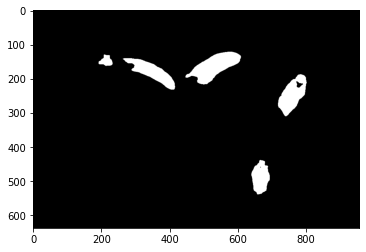

In [12]:
plt.imshow(moscas1 , 'gray') #moscas1

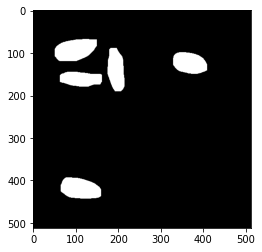

In [13]:
plt.imshow(moscas2 , 'gray')  #moscas2

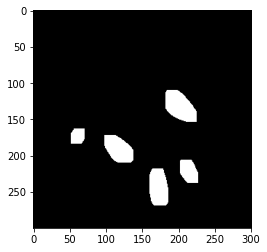

In [14]:
plt.imshow(moscas3 , 'gray')  #moscas3

Usando o método Canny para detectar as bordas de cada imagem:

In [15]:
moscas1 = cv2.Canny(moscas1 , 100 , 200)
moscas2 = cv2.Canny(moscas2 , 100 , 200)
moscas3 = cv2.Canny(moscas3 , 100 , 200)

Usando o método FindContours para conta a quantidade de bordas em cada imagem:

In [16]:
contours1, hierarchy1 = cv2.findContours(moscas1 , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, hierarchy2 = cv2.findContours(moscas2 , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours3, hierarchy3 = cv2.findContours(moscas3 , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

O que leva ao resultado final que é a quantidade de moscas em cada imagem.

In [17]:
print("Quantidade de moscas: \nPrimeira Foto: {} , Segunda Foto: {} , Terceira Foto: {}".format(len(contours1),len(contours2),len(contours3)))

Quantidade de moscas: 
Primeira Foto: 5 , Segunda Foto: 5 , Terceira Foto: 5


In [18]:
moscas1 = cv2.cvtColor(moscas1 , cv2.COLOR_GRAY2RGB)
moscas2 = cv2.cvtColor(moscas2 , cv2.COLOR_GRAY2RGB)
moscas3 = cv2.cvtColor(moscas3 , cv2.COLOR_GRAY2RGB)

Usando o método drawContours para destacar todos os contornos encontrados.

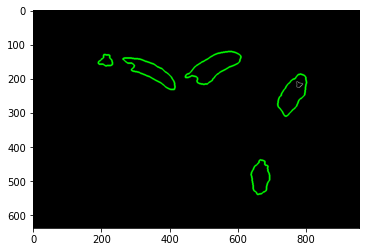

In [19]:
moscas1 = cv2.drawContours(moscas1 , contours1 , -1 , (0,255,0) , 3)
moscas2 = cv2.drawContours(moscas2 , contours2 , -1 , (0,0,255) , 3)
moscas3 = cv2.drawContours(moscas3 , contours3 , -1 , (255,0,0) , 3)
plt.imshow(moscas1) #moscas1

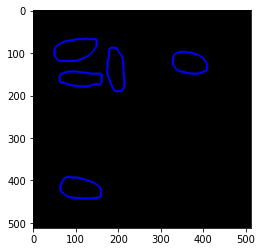

In [23]:
plt.imshow(moscas2) #moscas2

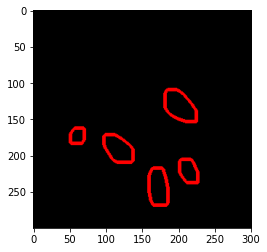

In [21]:
plt.imshow(moscas3) #moscas3